# Принятие решений в бизнесе

Вместе с отделом маркетинга мы подготовили список гипотез для увеличения выручки.
Приоритизируем гипотезы, запустим A/B-тест и проанализируем результаты. 

Проект будет состоять из двух частей:

**Часть 1. Приоритизация гипотез.**

**Цель исследования:**

* Выбрать наиболее приоритетные гипотезы для исследования.

**План исследования:**

* Применим фреймворк ICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.
* Применим фреймворк RICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.
* Пропишем, как изменилась приоритизация гипотез при применении RICE вместо ICE.

**Часть 2. Анализ A/B-теста**

**Цель исследования:**

* Принять решение по результатам теста:
    1. Остановить тест, зафиксировать победу одной из групп.
    2. Остановить тест, зафиксировать отсутствие различий между группами.
    3. Продолжить тест.

**План исследования:**

* Построим график кумулятивной выручки по группам.
* Построим график кумулятивного среднего чека по группам.
* Построим график относительного изменения кумулятивного среднего чека группы B к группе A.
* Построим график кумулятивного среднего количества заказов на посетителя по группам.
* Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A.
* Построим точечный график количества заказов по пользователям. .
* Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберем границу для определения аномальных пользователей.
* Построим точечный график стоимостей заказов.
* Посчитаем 95-й и 99-й перцентили стоимости заказов. Выберем границу для определения аномальных заказов.
* Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным.
* Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным.
* Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. 
* Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным.

In [1]:
# Импортируем необходимые библиотеки
import pandas as pd
import scipy.stats as stats
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_colwidth', 0)

## Приоритизация гипотез.

In [2]:
# Открываем файл с гипотезами и параметрами

hypothesis = pd.read_csv('C:\\StudentYandex\\Projekts\\Python\\Project7hipotiziz\\hypothesis.csv', sep=',')

In [3]:
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [4]:
# Приведем названия столбцов к хорошему стилю
hypothesis.columns = [column.lower() for column in hypothesis.columns]

In [5]:
# Считаем параметр ICE
hypothesis['ICE'] = round((hypothesis['impact']*hypothesis['confidence'])/hypothesis['efforts'],2)
ICE = hypothesis[['hypothesis','ICE']].sort_values(by='ICE',ascending = False)
ICE

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


* Наиболее перспективные гипотезы по ICE: 8, 0, 7, 6 и 2.

In [6]:
# Считаем параметр RICE
hypothesis['RICE'] = (hypothesis['reach']*hypothesis['impact']*hypothesis['confidence'])/hypothesis['efforts']
RICE = hypothesis[['hypothesis','RICE']].sort_values(by='RICE',ascending = False)
RICE

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


* Наиболее перспективные гипотезы по RICE: 7, 2, 0, 6 и 8.

In [7]:
hypothesis

,hypothesis,reach,impact,confidence,efforts,ICE,RICE
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,40.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00,4.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00,56.0
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12,9.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00,3.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33,4.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00,40.0
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.2


**Вывод:**

* Наиболее перспективные гипотезы, которые попали в топ 5 в ICE и RICE это 7, 2, 0, 6 и 8. Разная последовательность приоретизации в ICE и RICE т.к. RICE так же учитывает охват аудитории (`reach`) на которую подействуют изменения;

## Анализ A/B-теста

In [8]:
# Открываем файлы с результатами А/В теста

visitors = pd.read_csv('C:\\StudentYandex\\Projekts\\Python\\Project7hipotiziz\\visitors.csv')
orders = pd.read_csv('C:\\StudentYandex\\Projekts\\Python\\Project7hipotiziz\\orders.csv')

In [9]:
# Преобразовываем столбцы с датой
visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

In [10]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [11]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


#### Проведем предобработку данных

In [12]:
display(orders.info()) # Получаем информацию о таблице
display(orders.duplicated().sum()) # Проверяем количество дубликатов
orders.isna().sum() # Проверяем количество пропусков в каждом столбце

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


None

0

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

In [13]:
display(visitors.info()) # Получаем информацию о таблице
display(visitors.duplicated().sum()) # Проверяем количество дубликатов
visitors.isna().sum() # Проверяем количество пропусков в каждом столбце

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


None

0

date        0
group       0
visitors    0
dtype: int64

**Вывод:**

* Пропуски и дибликаты в таблицах отсутствуют, что не может не радовать.


In [14]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates() 

In [15]:
# cобираем агрегированные кумулятивные по дням данные о заказах
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

In [16]:
# Аналогично получим агрегированные кумулятивные по дням данные о посетителях интернет-магазина
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

In [17]:
# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

cumulativeData.head(5)

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


### **Построим графики кумулятивной выручки по дням и группам A/B-тестирования:**

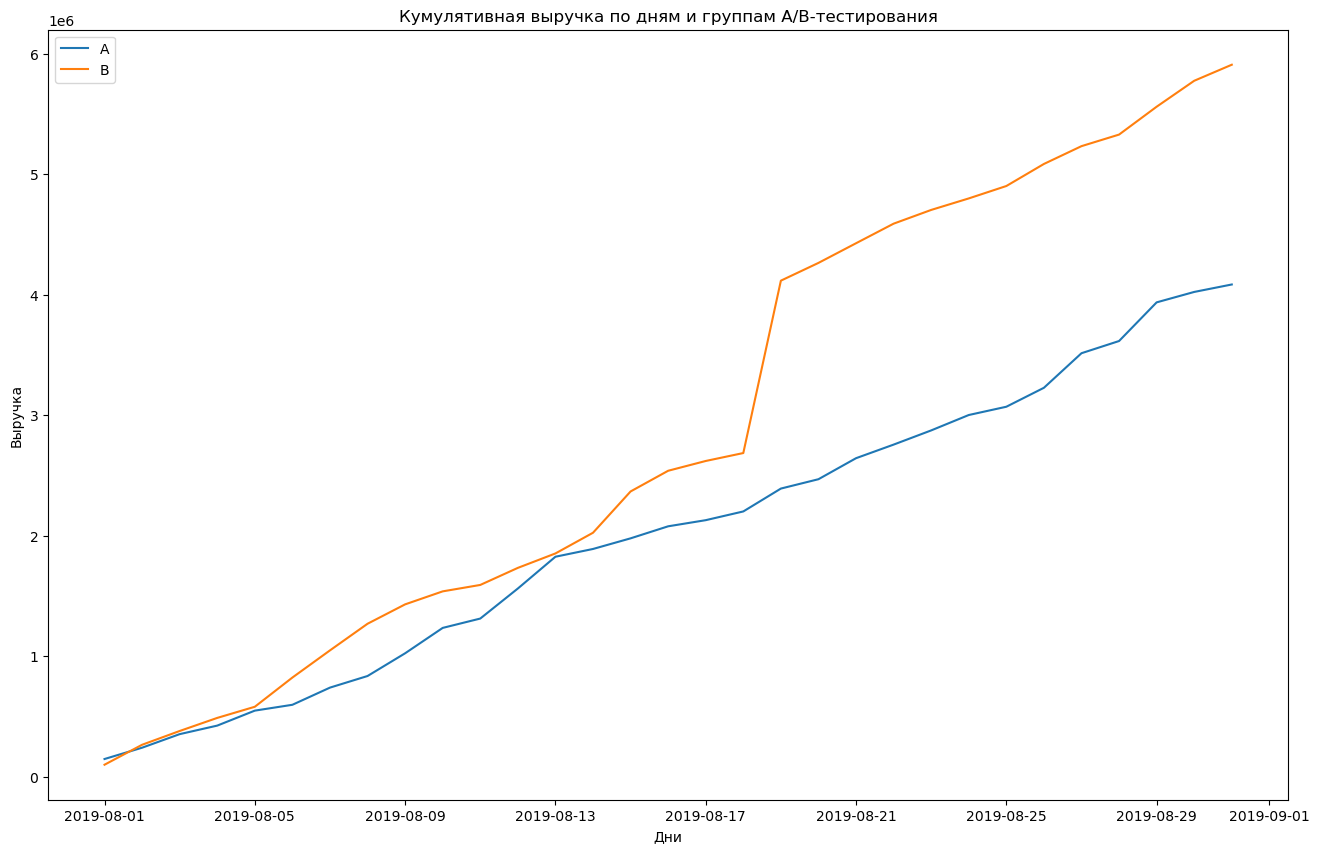

In [18]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

plt.figure(figsize=(16, 10))
# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.legend() 
plt.title('Кумулятивная выручка по дням и группам A/B-тестирования')
plt.xlabel('Дни')
plt.ylabel('Выручка')
plt.show()

* Выручка почти равномерно увеличивается в течение всего теста. Хороший знак;
* График выручки `группы B` в одной точке резко растет. Это может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке. 

### **Построим графики среднего чека по группам — разделим кумулятивную выручку на кумулятивное число заказов**

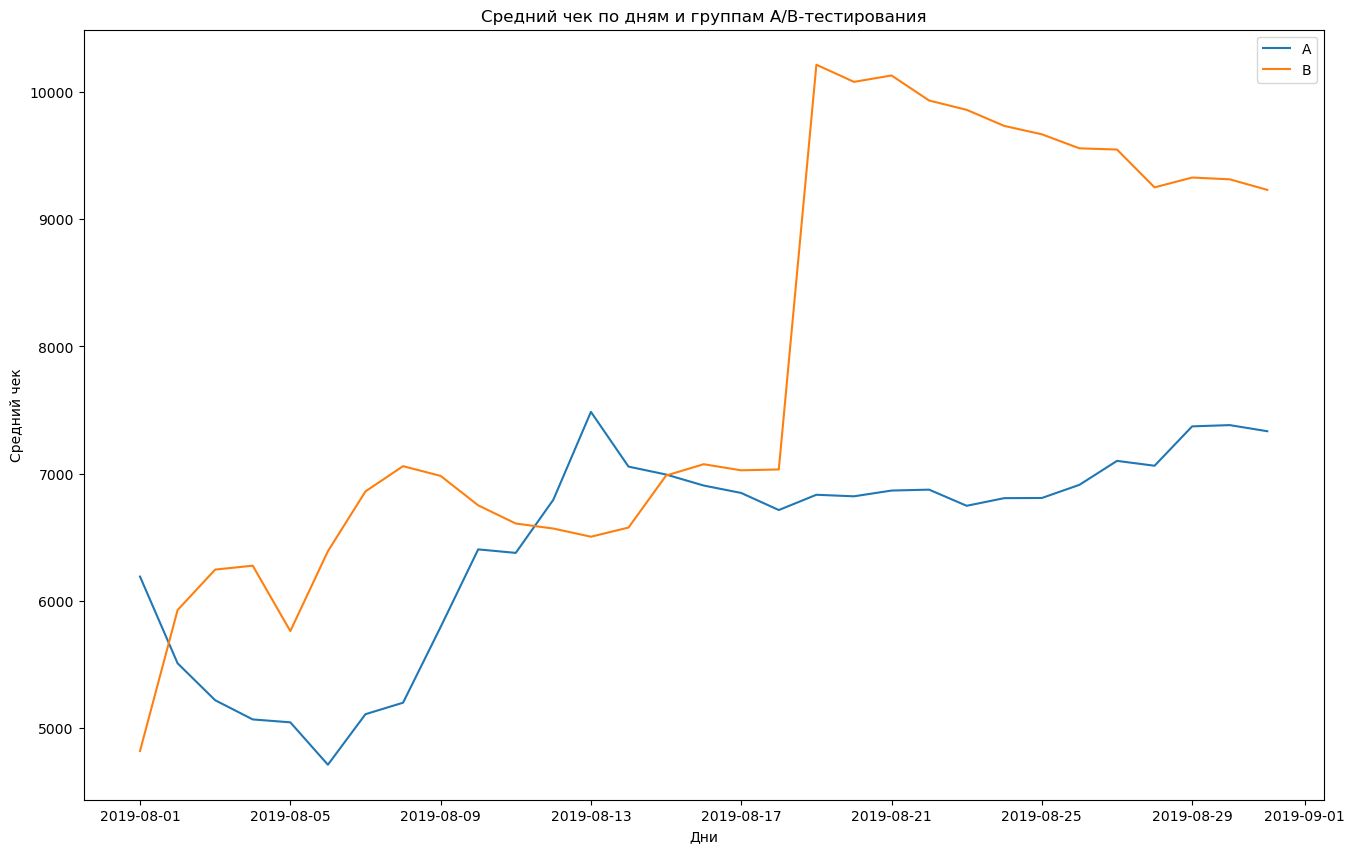

In [19]:
plt.figure(figsize=(16, 10))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend()
plt.title('Средний чек по дням и группам A/B-тестирования')
plt.xlabel('Дни')
plt.ylabel('Средний чек')
plt.show()

* Cредний чек тоже становится равномерным ближе к концу теста: установился для группы A и для группы B. Возможно, в группу B во второй половине теста попали крупные заказы (резкий всплеск на графике). Тогда ей нужно больше данных, чтобы прийти к реальному среднему чеку и установиться на его уровне.

### **Построим график относительного изменения кумулятивного среднего чека группы B к группе A**

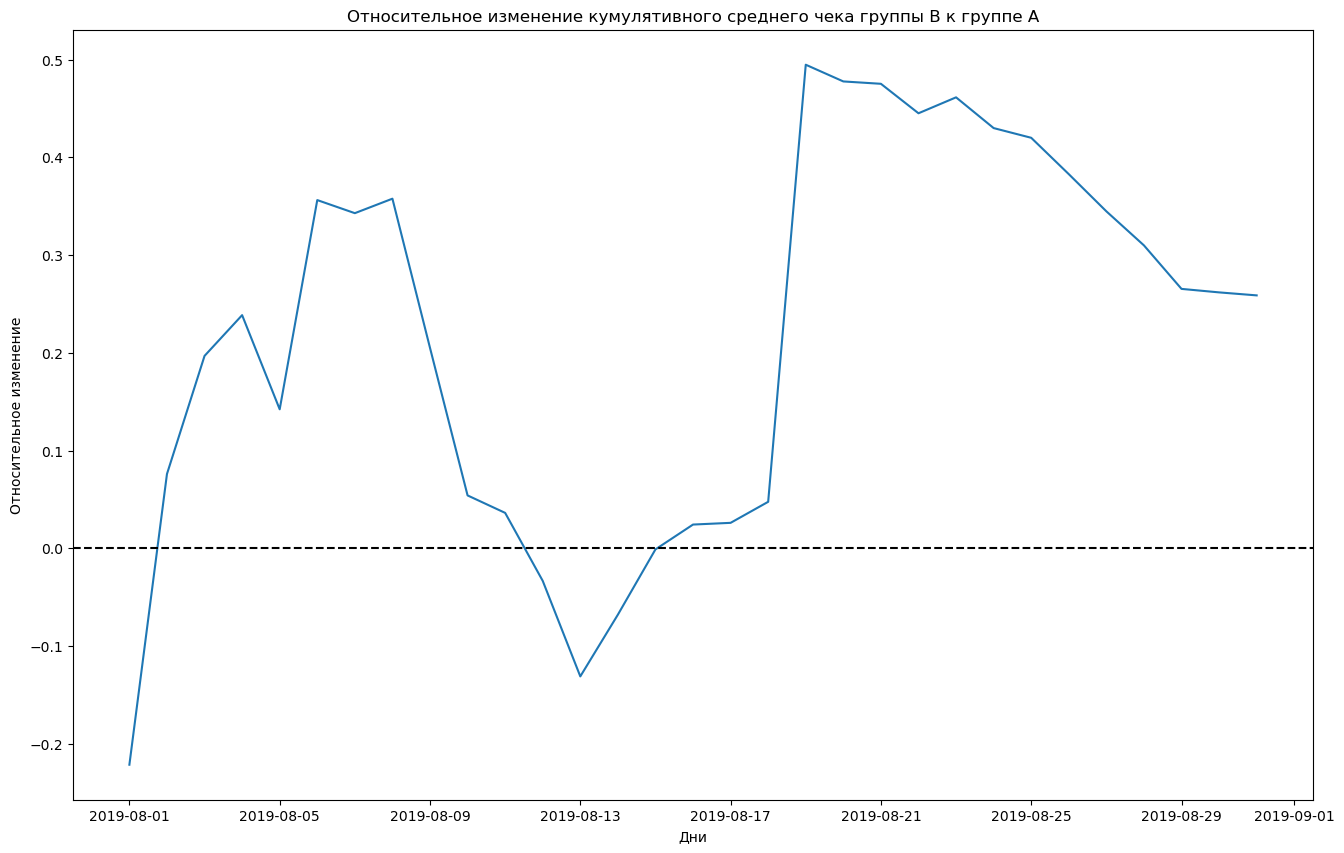

In [20]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(16, 10))
# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Относительное изменение кумулятивного среднего чека группы B к группе A')
plt.xlabel('Дни')
plt.ylabel('Относительное изменение')
plt.show()

* В нескольких точках график различия между сегментами резко «скачет». Где-то уж точно спрятались крупные заказы и выбросы;

### **Построим график кумулятивного среднего количества заказов на посетителя по группам. Проанализируем график**

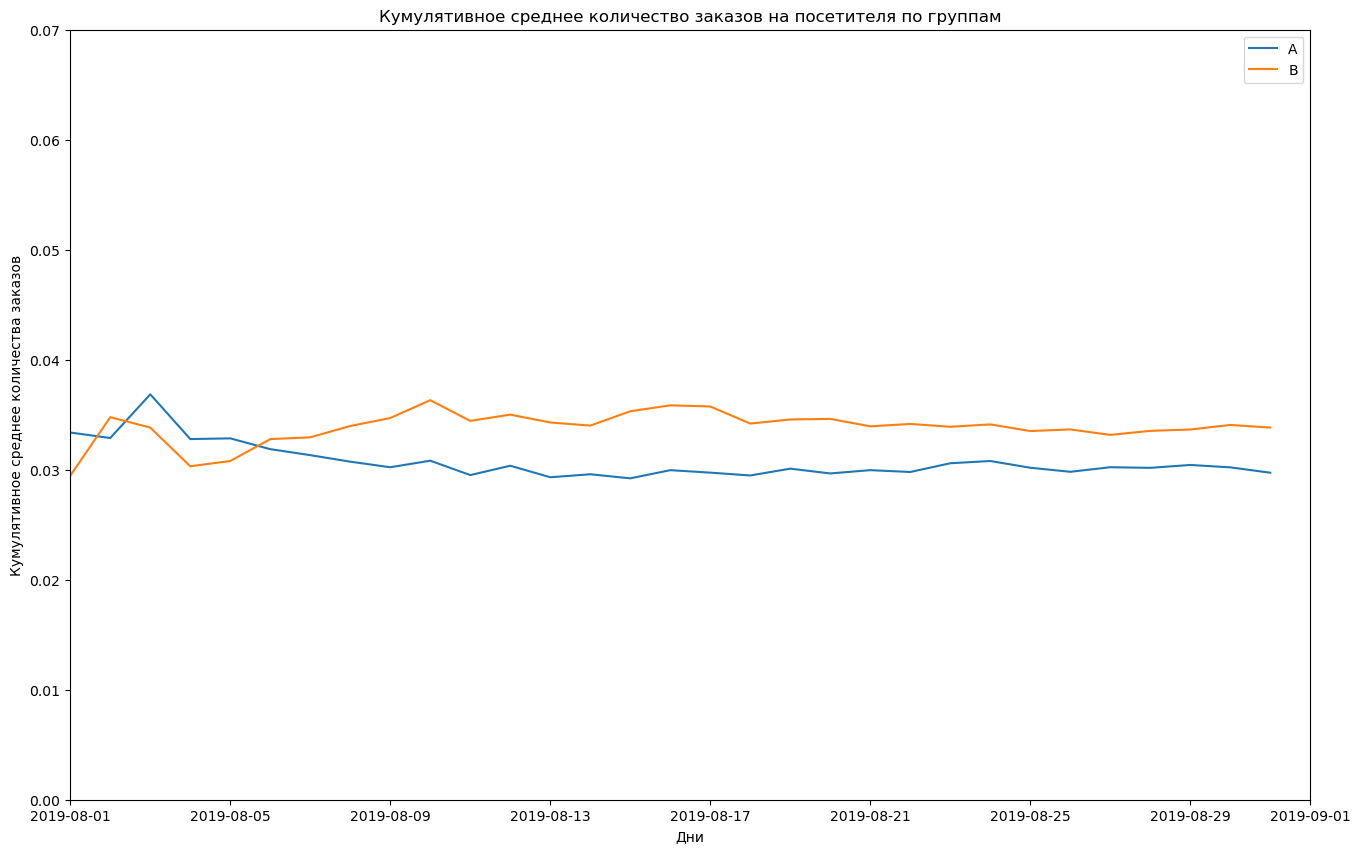

In [21]:
# считаем кумулятивное количество заказов
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

plt.figure(figsize=(16, 10))
# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.title('Кумулятивное среднее количество заказов на посетителя по группам')
plt.xlabel('Дни')
plt.ylabel('Кумулятивное среднее количества заказов')
# задаем масштаб осей
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 9, 1), 0, 0.07])
plt.show()

* Группы сильно колебались в первые 6 дней теста, но затем количество заказов группы В вырвалась вперёд и зафиксировалась, а количество заказов группы А просела и также зафиксировалась.

### **Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A**

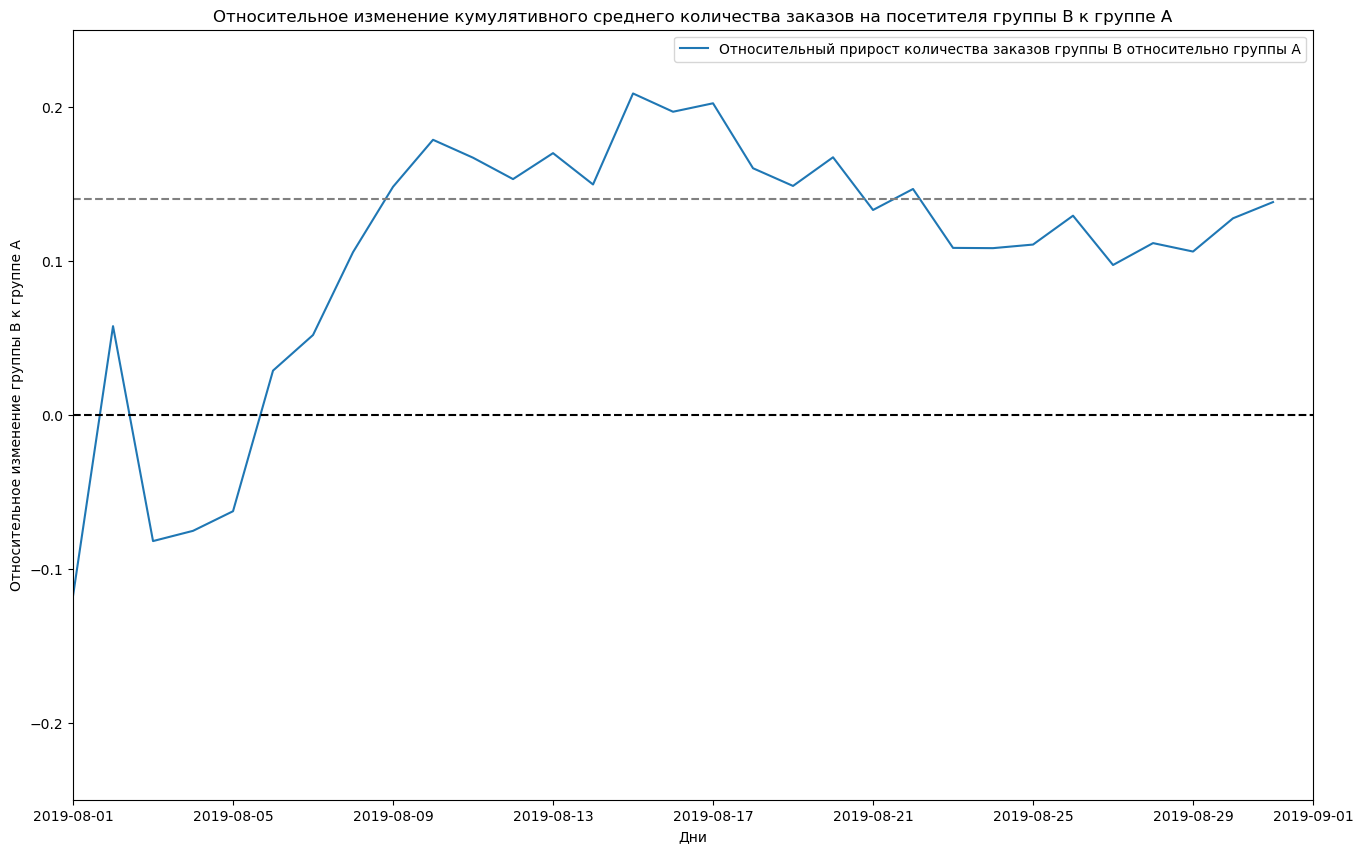

In [22]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(16, 10))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост количества заказов группы B относительно группы A")
plt.legend()
plt.title('Относительное изменение кумулятивного среднего количества заказов на посетителя группы B к группе A')
plt.xlabel('Дни')
plt.ylabel('Относительное изменение группы B к группе A')
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y= 0.14, color='grey', linestyle='--')
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 9, 1), -0.25, 0.25]) 
plt.show()

* В начале теста группа B "проигрывала" группе A, затем вырвалась вперёд и снова ушла в минус. После 6 дня эксперимента её количество заказов сильно пошла вверх, и стала снижатся и зафиксировалась на росте.
* Проанализируем аномалии, возможно, они изменят картину.

### **Построим точечный график количества заказов по пользователям.**

In [23]:
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)

ordersByUsers.columns = ['userId', 'orders']
ordersByUsers.sort_values(by='orders', ascending=False).head(10)

,userId,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


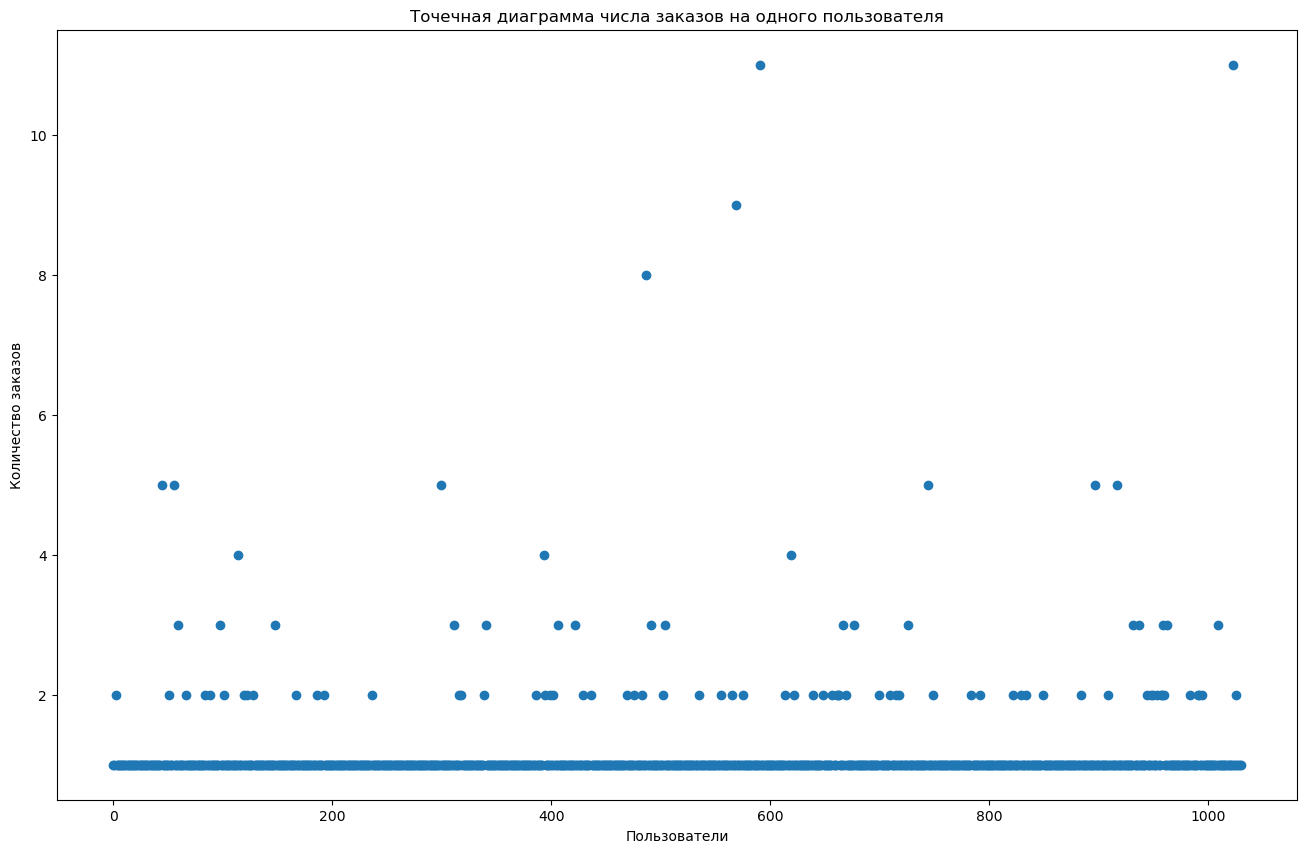

In [24]:
# строим точечную диаграмму числа заказов на одного пользователя
x_values = pd.Series(range(0,len(ordersByUsers)))
plt.figure(figsize=(16, 10))
plt.scatter(x_values, ordersByUsers['orders']) 
plt.title('Точечная диаграмма числа заказов на одного пользователя')
plt.xlabel('Пользователи')
plt.ylabel('Количество заказов')
plt.show()

* Много пользователей с 1-3 заказами. Их точная доля не ясна — непонятно, считать их аномалиями или нет. 

### Посчитаем выборочные перцентили количества заказов на одного пользователя:

In [25]:
np.percentile(ordersByUsers['orders'], [95, 99])

array([2., 4.])

* Не более 5% пользователей оформляли больше чем 2 заказ. И 1 % пользователей заказывали более четырех раз. 
* Разумно выбрать 3 заказа на одного пользователя за верхнюю границу числа заказов, и отсеять аномальных пользователей по ней.

### Построим точечный график стоимостей заказов.

In [26]:
orders.sort_values(by='revenue', ascending=False).head(10)

,transactionId,visitorId,date,revenue,group
425,590470918,1920142716,2019-08-19,1294500,B
1196,3936777065,2108080724,2019-08-15,202740,B
858,192721366,1316129916,2019-08-27,93940,A
1136,666610489,1307669133,2019-08-13,92550,A
744,3668308183,888512513,2019-08-27,86620,B
682,1216533772,4266935830,2019-08-29,78990,B
662,1811671147,4266935830,2019-08-29,78990,A
743,3603576309,4133034833,2019-08-09,67990,A
1103,1348774318,1164614297,2019-08-12,66350,A
1099,316924019,148427295,2019-08-12,65710,A


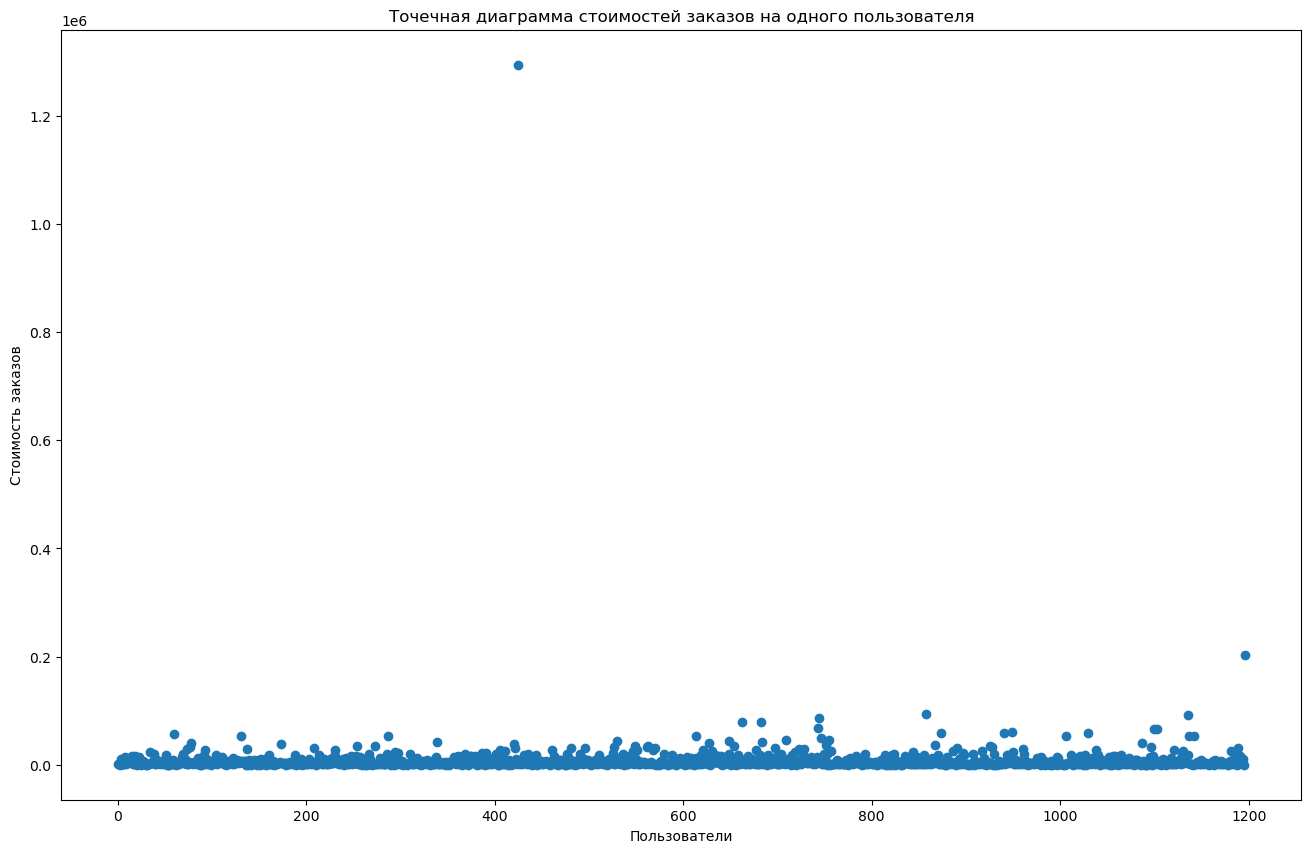

In [27]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.figure(figsize=(16, 10))
plt.scatter(x_values, orders['revenue']) 
plt.title('Точечная диаграмма стоимостей заказов на одного пользователя')
plt.xlabel('Пользователи')
plt.ylabel('Стоимость заказов')
plt.show()

* Как в таблице так и на графике видим всплески: заказ свыше 200 000 руб, а один свыше 1 000 000 руб.

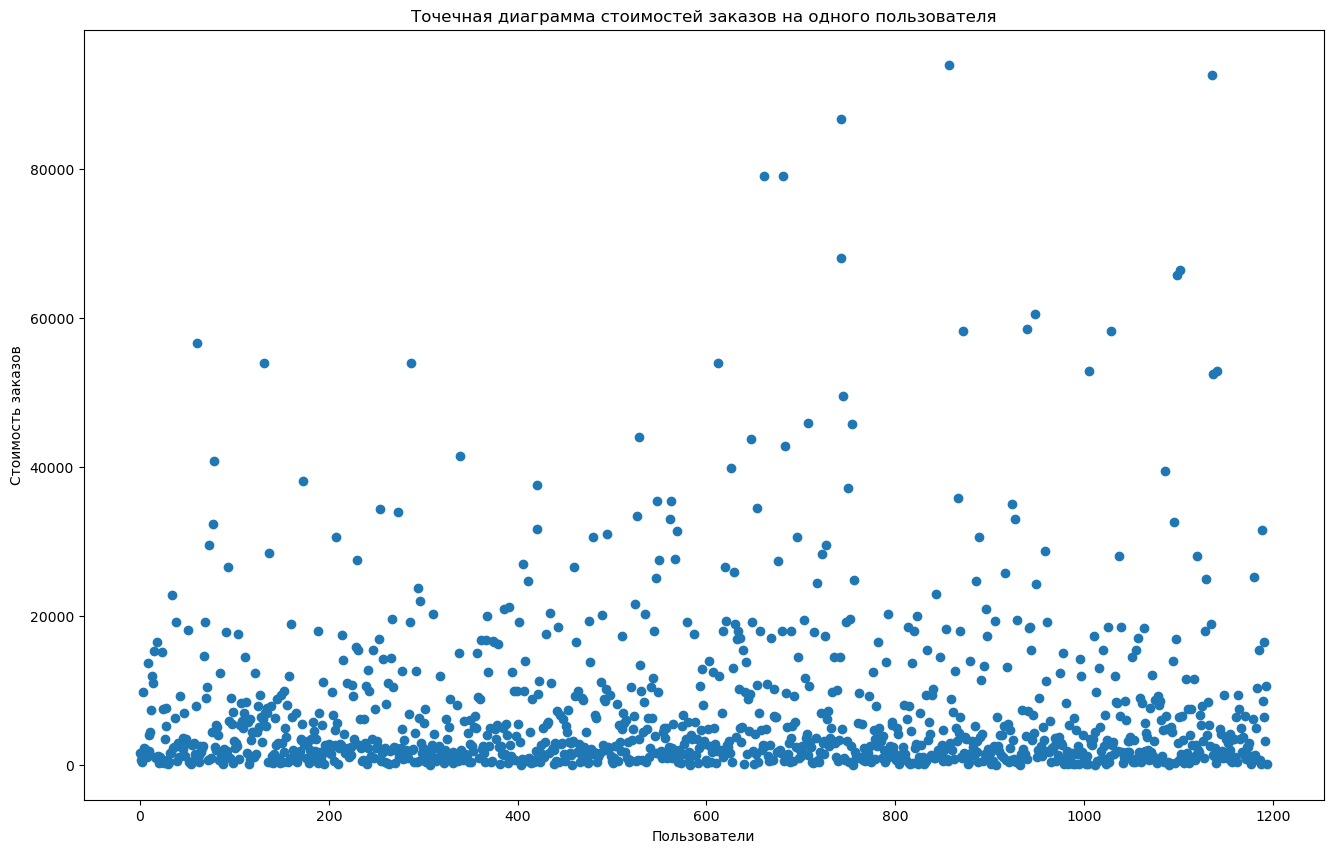

In [28]:
# строим диаграмму без выбросов
x_values = pd.Series(range(0,len(orders[orders['revenue']<200000]['revenue'])))
plt.figure(figsize=(16, 10))
plt.scatter(x_values, orders[orders['revenue']<200000]['revenue']) 
plt.title('Точечная диаграмма стоимостей заказов на одного пользователя')
plt.xlabel('Пользователи')
plt.ylabel('Стоимость заказов')
plt.show()

* Без выбросов видим что большинство заказов стоимость до ~ 60 000 рублей

### Посчитаем 95-й и 99-й перцентили стоимости заказов

In [29]:
np.percentile(orders['revenue'], [95, 99])

array([28000. , 58233.2])

* Не более 5% заказов дороже 28 000 рублей и не более 1% дороже 58 233 рублей;
* Судя по графику разумно выбрать 58000 руб на один заказ за верхнюю границу числа заказов, и отсеять аномальных пользователей по ней.

### Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. 

Сформулируем гипотезы:

**Нулевая: различий в среднем количестве заказов, по "сырым" данным, между группами нет.** 

**Альтернативная: различия в среднем, по "сырым" данным, между группами есть.**

**alpha = 0.05**

In [30]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

data.head()

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


Названия столбцов данных:
* date — дата;
* ordersPerDateA — количество заказов в выбранную дату в группе A;
* revenuePerDateA — суммарная выручка в выбранную дату в группе A;
* ordersPerDateB — количество заказов в выбранную дату в группе B;
* revenuePerDateB — суммарная выручка в выбранную дату в группе B;
* ordersCummulativeA — суммарное число заказов до выбранной даты включительно в группе A;
* revenueCummulativeA — суммарная выручка до выбранной даты включительно в группе A;
* ordersCummulativeB — суммарное количество заказов до выбранной даты включительно в группе B;
* revenueCummulativeB — суммарная выручка до выбранной даты включительно в группе B;
* visitorsPerDateA — количество пользователей в выбранную дату в группе A;
* visitorsPerDateB — количество пользователей в выбранную дату в группе B;
* visitorsCummulativeA — количество пользователей до выбранной даты включительно в группе A;
* visitorsCummulativeB — количество пользователей до выбранной даты включительно в группе B.

In [31]:
# создаем две переменные с количеством заказов на каждого пользователя по группам
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders'] 

In [32]:
# Объявим переменные в которых пользователям из разных групп будет соответствовать количество заказов. 
# Тем, кто ничего не заказал, будут соответствовать нули. 
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

In [33]:
print('p-value =', "{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print('Относительный прирост среднего числа заказов группы B:',"{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

p-value = 0.017
Относительный прирост среднего числа заказов группы B: 0.138


* p-value меньше 0,05 Значит, нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет - отвергаем её;
* Относительный прирост среднего числа заказов группы B по «сырым» данным: 13,8 %;
* **По «сырым» данным статистические различия в среднем числе заказов групп A и B есть.**

### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным.

**Нулевая гипотеза: различий в среднем чеке, по "сырым" данным, между группами нет.**

**Альтернативная гипотеза: различия в среднем чеке, по "сырым" данным, между группами есть.**

**alpha = 0.05**

In [34]:
print('p-value =','{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('Относительный прирост среднего чека заказов группы B:','{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

p-value = 0.729
Относительный прирост среднего чека заказов группы B: 0.259


* p-value значительно больше 0.05. **Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть статистически значимые различия, нет**;
* относительный прирост среднего чека заказов группы B: 25,9%

### Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. 

Сформулируем гипотезы:

**Нулевая: различий в среднем количестве заказов, по "очищенным" данным, между группами нет.** 

**Альтернативная: различия в среднем, по "очищенным" данным, между группами есть.**

**alpha = 0.05**

Узнаем, сколько всего аномальных пользователей:

In [35]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 3]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > 3]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 58000]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
display(abnormalUsers.head(5))
abnormalUsers.shape[0]

1099    148427295
18      199603092
23      237748145
949     887908475
744     888512513
dtype: int64

20

Всего 20 аномальных пользователей. 
Посмотрим, как их действия повлияли на результаты теста.

In [36]:
# готовим выборки количества заказов по пользователям по группам теста
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

In [37]:
# считаем статистическую значимость различий в среднем количестве заказов между группами теста по очищенным данным
print('p-value =','{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Относительный прирост среднего числа заказов группы B:','{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

p-value = 0.014
Относительный прирост среднего числа заказов группы B: 0.151


* p-value выросло, но все равно меньше 0,05 Значит, нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет - отвергаем;
* Относительный прирост среднего числа заказов группы B по «очищенным» данным: 15,1 %;
* **По «очищенным» данным статистические различия в среднем числе заказов групп A и B есть.**

### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. 

**Нулевая гипотеза: различий в среднем чеке, по "очищенным" данным, между группами нет.**

**Альтернативная гипотеза: различия в среднем чеке, по "очищенным" данным, между группами есть.**

**alpha = 0.05**

In [38]:
display('p-value =',
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print('Относительный прирост среднего чека заказов группы B:',
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
) 

'p-value ='

'0.959'

Относительный прирост среднего чека заказов группы B: -0.014


* p-value стало еще значительнее 0.05. **Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть статистически значимые различия, нет**;
* относительный прирост среднего чека заказов группы B сократился до - 1,4%

## Вывод:


Мы провели исследование данных состоящее их двух частей, такие результаты мы получили:

Часть 1:

* Наиболее перспективные гипотезы по ICE: 8, 0, 7, 6 и 2.

* Наиболее перспективные гипотезы по RICE: 7, 2, 0, 6 и 8.

* Наиболее перспективные гипотезы, которые попали в топ 5 в ICE и RICE это 7, 2, 0, 6 и 8. Разная последовательность приоретизации в ICE и RICE т.к. RICE так же учитывает охват аудитории (`reach`) на которую подействуют изменения;

Часть 2:

* По сырым данным нет статистически значимого различия по среднему чеку между группами. Так и после удаления аномалий статистически значимого различия нет.
* По сырым данным как и по очищенным есть статистически значимое различие в среднем числе заказов групп A и B . 

* График различия конверсии между группами сообщает, что результаты группы B лучше группы A: имеет тенденцию к росту.

* График различия среднего чека колеблется: он-то и позволил нам найти аномалии. Сделать из этого графика определённые выводы нельзя.

**Исходя из вышеперечисленного необходимо Остановить тест, признать его успешным и перейти к проверке следующей гипотезы. Группа B лучше группы А**